En la provincia de Artemisa, los precios de bienes de consumo y servicios presentan una marcada fragmentación y variabilidad como expresion de lo que sucede en todo el pais y  responden a un proceso de dolarizacion parcial de la economia con el concebido perjuicio al poder adquisitivo de la poblacion y a la coexistencia de tres dinamicas  economicas distintas:

1-MIPYMES locales:

-Ofrecen productos y servicios con precios fijados de manera independiente.

-Existe una gran variabilidad entre negocios, incluso dentro de la misma categoría de productos.

-La falta de regulación juridica uniforme,genera dispersión de precios y desigual acceso para los consumidores.

2-Tiendas estatales en MLC y USD:

-Los precios están dolarizados y sujetos a la tasa oficial de cambio.

-La canasta básica en estas tiendas resulta inaccesible para gran parte de la población que percibe salarios en CUP.

-La escasez de productos provoca que los consumidores dependan de alternativas privadas o del mercado informal.

3-Mercado informal reflejado en El Toque:

-La tasa de cambio CUP–USD/MLC publicada por El Toque muestra una brecha creciente respecto a la oficial.

-Esta diferencia impacta directamente en la conversión de precios y en el poder adquisitivo real de los habitantes de Artemisa.

-La inestabilidad  genera incertidumbre y dificulta la planificación económica de hogares y negocios.

Problema central:

La variacion de precios entre MIPYMES, tiendas estatales en MLC/USD y el mercado informal (según El Toque) provoca una distorsión en el costo de vida en Artemisa, dificultando:

-La comparación objetiva de precios entre sectores.

-La medición del poder adquisitivo real de los salarios en CUP.

-La identificación de tendencias inflacionarias locales.


El proyecto busca analizar y modelar los precios en Artemisa a partir de estas tres fuentes, con el fin de:

-Construir un índice de precios provincial que refleje la realidad económica.

-Detectar la brecha de precios entre oferta estatal y privada.

-Evaluar el impacto de la tasa de cambio informal sobre los precios locales.

-Proponer visualizaciones que permitan entender la evolución de precios y su accesibilidad para la población.

Para ver un ejemplo de esto vamos a realizar un analisis economico  de la provincia de Artemisa,analizando el costo de un producto tan comun entre las mipymes como lo es el refresco de lata :

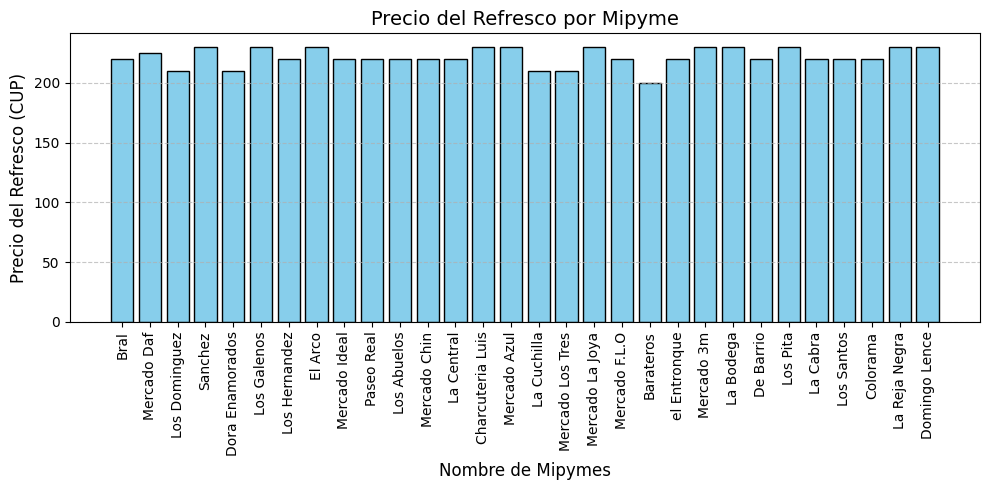

En el siguiente grafico observamos como en todas las mipymes de la provincia de Artemisa,el precio del Refresco de Lata supera los $200 excepto en 1
Ahora en caso de que queramos saber una cantidad de dinero con la cual podemos ir a Artemisa a comprarnos un Refresco de Lata,basta con analizar el promedio del precio de estas el cual es: 
$221.83333333333334
Pero esto seria un valor aproximado si queremos redondearlo bastaria con dejarlo en: 
$222


In [6]:
from Funciones.biblioteca import open_json,promedio
import glob
import matplotlib.pyplot as plt
#Creo una variable llamada direcciones para almacenar el contenido de todos los json utilizando glob.glob la cual de una direccion que le asignemos nos recoge todos los archivos que en este caso terminen en .json
direcciones= glob.glob("./Mipymes/*.json")
#Creo una lista para almacenar todo el contenido que hay en direcciones
contenido = [ ]
for i in direcciones :
    contenido.append(dict(open_json(i)))
#Como vamos a analizar el precio del refresco en las mipymes creamos una lista para almacenar todos los precios de las mipymes la cual tendria 30 precios ya que el refresco de lata es un preducto que se repite en todas 
precio_refresco_m = []
for x in contenido:
    for refresco in x["Productos"]:
       if refresco["nombre"]=="Refresco de Lata":
           precio_refresco_m.append(refresco["precio"])

nombre_mipymes = []
for mip in contenido:
        nombre_mipymes.append(mip["Nombre"])

# Datos
nombre_mipymes
precio_refresco_m
# Crear gráfico de barras
plt.figure(figsize=(10, 5))  # Tamaño del gráfico
plt.bar(nombre_mipymes, precio_refresco_m, color="skyblue", edgecolor="black")

# Personalizar
plt.title("Precio del Refresco por Mipyme", fontsize=14)
plt.xlabel("Nombre de Mipymes", fontsize=12)
plt.ylabel("Precio del Refresco (CUP)", fontsize=12)
plt.xticks(rotation=90)  # Rotar etiquetas si son largas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar
plt.tight_layout()
plt.show()

print("En el siguiente grafico observamos como en todas las mipymes de la provincia de Artemisa,el precio del Refresco de Lata supera los $200 excepto en 1")

promedio_del_refresco = promedio(precio_refresco_m)
valor_del_refresco_redondeado = round(promedio_del_refresco)

print(f"Ahora en caso de que queramos saber una cantidad de dinero con la cual podemos ir a Artemisa a comprarnos un Refresco de Lata,basta con analizar el promedio del precio de estas el cual es: \n${promedio_del_refresco}")
print(f"Pero esto seria un valor aproximado si queremos redondearlo bastaria con dejarlo en: \n${valor_del_refresco_redondeado}")






Anteriormente vimos a traves del grafico reflejado el comportamiento del precio del refresco de lata en las mipymes de la provincia de Artemisa,pero en nuestro pais no solo se puede acceder a este producto a traves de las mipymes solamente,ya que la poblacion puede acceder a las tiendas de mlc y usd que existen en las distintas provincias de nuestro pais,pero en este caso a las que estan ubicadas en esta provincia(Artemisa)

Dicho esto pasemos a analizar el costo del refresco de lata en estas,teniendo en cuenta que como estamso analizando solamente precios es el mismo en todas las tiendas lo que cuesta un refresco de lata en una tienda en mlc es lo mismo que cuesta en la tienda en usd:

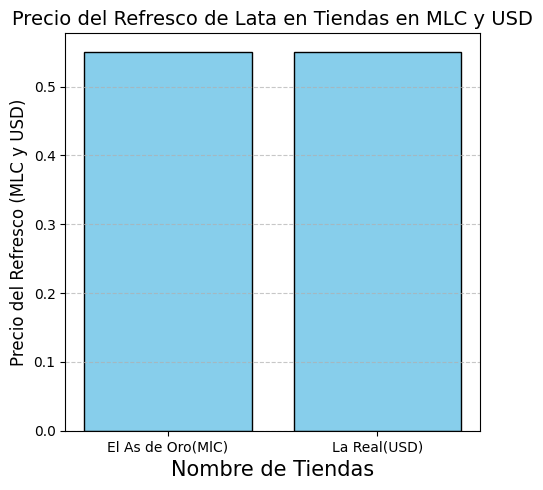

In [7]:
#Declaramos dos variables para almacenar la informacion en los json que guardan la informacion sobre las tiendas en mlc y usd 
tienda_mlc = open_json("Tiendas en MlC y USD/mlc.json")
tienda_usd = open_json("Tiendas en MlC y USD/usd.json")
#Creamos dos listas para guardar la informacion que queremos sacar de estos en ellas
refresco_mlc = []
refresco_usd = []
#Iteramos sobre la informacion en las variables que declaramos anterirmente para sacar especificamente el precio del refresco y en el caso de la tienda de mlc
for m in tienda_mlc["Productos"]:
    if m["nombre"] == "Refresco de Lata":
        refresco_mlc.append(m["precio"])
for u in tienda_usd["Productos"]:
    if u["nombre"] == "Refresco de Lata":
        refresco_usd.append(u["precio"])
#Despues de haber accedido al valor especifico el cual es el precio lo guardamos en las listas creadas anteriormente 

#Ahora para realizar un grafico que nos muestre de una mejor forma lo que estamos analizando haremos lo siguiente:
#Creamos una lista para almacenar el valor del precio de ambas tiendas
precio_tiendas = []
for pm in refresco_mlc:
    precio_tiendas.append(pm)
for pu in refresco_usd:
    precio_tiendas.append(pu)

# Datos
nombre_tiendas = ["El As de Oro(MlC)","La Real(USD)"]
precio_tiendas 
# Crear gráfico de barras
plt.figure(figsize=(5, 5))  # Tamaño del gráfico
plt.bar(nombre_tiendas, precio_tiendas, color="skyblue", edgecolor="black")

# Personalizar
plt.title("Precio del Refresco de Lata en Tiendas en MLC y USD", fontsize=14)
plt.xlabel("Nombre de Tiendas", fontsize=15)
plt.ylabel("Precio del Refresco (MLC y USD)", fontsize=12)
plt.xticks(rotation=0)  # Rotar etiquetas si son largas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar
plt.tight_layout()
plt.show()

    

    


En el grafico anterior podemos apreciar como el precio del Refresco de Lata tiene el mismo costo en la tienda en mlc y en usd pero esto no quiere decir que su valor al cambio teniendo en cuenta los valores que toman el mlc y el usd en el mercado informal sea el mismo.Es todo lo contrario por eso ahora realizaremos un analisis del comportamiento o sea la evolucion que tienen los precios de estas monedas segun el mercado informal

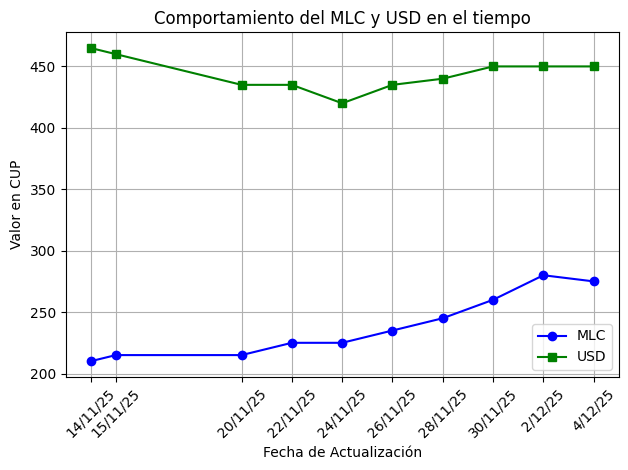

In [12]:
import matplotlib.pyplot as plt
from datetime import datetime
#Comenzaremos creando una variable que almacene la informacion recogida en los json de la carpeta Tasa de Cambio
direcciones_cambio = glob.glob("./Tasa de Cambio/*.json")
#Creamos una lista para guardar la informacion a traves de la cual queremos acceder cuando iteremos sobre la informacion guardada en anteriormente
contenido_cambio = []
for k in direcciones_cambio:
    contenido_cambio.append(dict(open_json(k)))
#Creamos una lista para almacenar las fechas de actualizacion de la moneda en el transcurso de la investigacion
fecha = []
for f in contenido_cambio:
    fecha.append(f["Fecha de Actualizacion"])
#Creamos una lista para guardar los diferentes precios que ha tomado la moneda mlc en el transcurso de la investigacion
valor_cambiomlc = []
for preciomlc in contenido_cambio:
    for vprecio in preciomlc["Cambio"]:
        if vprecio["nombre"] == "MLC":
            valor_cambiomlc.append(vprecio["valor"])
#Creamos una lista para guardar los diferentes precios que ha tomado la moneda usd en el transcurso de la investigacion
valor_cambiousd = []
for preciousd in contenido_cambio:
    for vprecio in preciousd["Cambio"]:
        if vprecio["nombre"] == "USD":
            valor_cambiousd.append(vprecio["valor"])

# Datos
fecha 
valor_cambiomlc 
valor_cambiousd 

# Convertir fechas y ordenar todo
fechas_convertidas = [datetime.strptime(f, "%d/%m/%y") for f in fecha]
datos = list(zip(fechas_convertidas, valor_cambiomlc, valor_cambiousd))
datos.sort()  # ordena por fecha

# Separar datos ya ordenados
fechas_ordenadas = [d[0] for d in datos]
mlc_ordenado = [d[1] for d in datos]
usd_ordenado = [d[2] for d in datos]

# Graficar
plt.plot(fechas_ordenadas, mlc_ordenado, 'o-b', label='MLC')
plt.plot(fechas_ordenadas, usd_ordenado, 's-g', label='USD')
plt.xticks(rotation=45)
plt.title("Comportamiento del MLC y USD en el tiempo")
plt.xlabel("Fecha de Actualización")
plt.ylabel("Valor en CUP")
plt.legend()
plt.grid(True)
# Usar las fechas originales como etiquetas
plt.xticks(ticks=fechas_convertidas, labels=fecha, rotation=45)
plt.tight_layout()

plt.show()


Analizando el grafico mostrado en pantalla vemos que la diferencia de precios es muy grande por ejemplo en lo que el 14/11/26 el mlc costaba mas de $200 y menos de $250 el usd costaba mas de $450 y menos de $460 por lo que asi visualmente podemos llegar a la conclusion de que es mejor comprar refresco de lata en una tienda en mlc que en un una en usd pero aqui estamos olvidando lo que costaba en una mipyme,es por esto que ahora realizaremos un analisis en el cual convertiremos el precio del refresco de lata de ambas tiendas,tomando el valor que tienen ambas monedas en el mercado informal y los compararemos para observar  cual de estas 3 opciones es mas economica

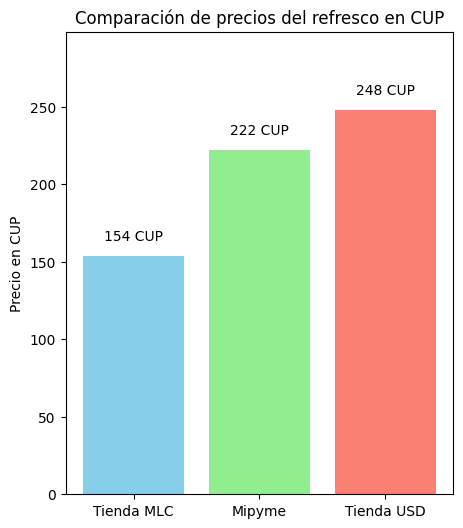

In [9]:
from Funciones.biblioteca import convertir
import matplotlib.pyplot as plt
from operator import itemgetter  #se usa para ordenar listas de tuplas o listas de listas
#En estas tres variables tenemos almacenados los siguientes valores:
valor_del_refresco_redondeado#promedio de lo que cuesta un refresco de lata en artemisa
refresco_mlc#el precio que tiene el refresco de lata en mlc
refresco_usd#el precio que tiene el refresco de lata en usd
valor_cambiomlc#precios del mlc durante el transcurso de la investigacion
valor_cambiousd#precios del usd durante el transcurso de la investigacion

#Ahora si queremos saber caunto cuesta un el refresco en cualquiera de las dos tiendas(MLC o USD) basta con multiplicar el valor que tiene en estas x el valor que le corresponde en el mercado informal
nv_mlc = convertir(refresco_mlc[0],valor_cambiomlc[-1])
nv_usd = convertir(refresco_usd[0],valor_cambiousd[-1])
#En este momento ya tendriamos lo que cuesta un refresco en (CUP) en las tiendas y en las mipymes solo faltaria compararlos 
#Vamos a crear una lista para almacenar el precio que tiene el Refresco de Lata en cada una de estas fuentes para ordenar cada uno de ellos y saber en cual es mas factible comprar
t_precioscup = []
t_precioscup.extend([nv_mlc,nv_usd,valor_del_refresco_redondeado])
#para ordenar los valores de esta lista basta con utilizar el funcion sorted
orden = sorted(t_precioscup)

# Valores en CUP
nv_mlc 
nv_usd 
valor_del_refresco_redondeado

# Lista con nombre y valor
fuentes = [
    ("Tienda MLC", nv_mlc),
    ("Tienda USD", nv_usd),
    ("Mipyme", valor_del_refresco_redondeado)
]

# Ordenar por el segundo elemento (precio) usando itemgetter
fuentes.sort(key=itemgetter(1))

# Separar nombres y valores
nombres, valores = zip(*fuentes)

# Crear gráfico
plt.figure(figsize=(5, 6))#Tamaño del grafico
plt.bar(nombres, valores, color=["skyblue", "lightgreen", "salmon"])
plt.title("Comparación de precios del refresco en CUP")
plt.ylabel("Precio en CUP")

# Mostrar valores encima de cada barra
for i, v in enumerate(valores):
    plt.text(i, v + 10, f"{v} CUP", ha='center')
# Ajustar límite del eje Y
plt.ylim(0, max(valores) + 50)

plt.show()




Podemos observar en le grafico anterior como influye el valor correspondiente al mlc y al usd en la tasa de cambio con respecto al producto analizado(Refresco de Lata) pero debemos tener en ceunta que esto pasa para todos los productos asi que este mismo analisis que hicimos con el Refresco de Lata lo podriamos hacer con cualquier otro producto siempre teniendo en cuenta que este en las 3 fuentes de informacion que contiene el proyecto

Otra casa que podriamos analizar es la evolucion del precio del Refresco de Lata a medida que fue evolucionando el usd y el mlc segun el mercado informal y su valor al cambio en cup

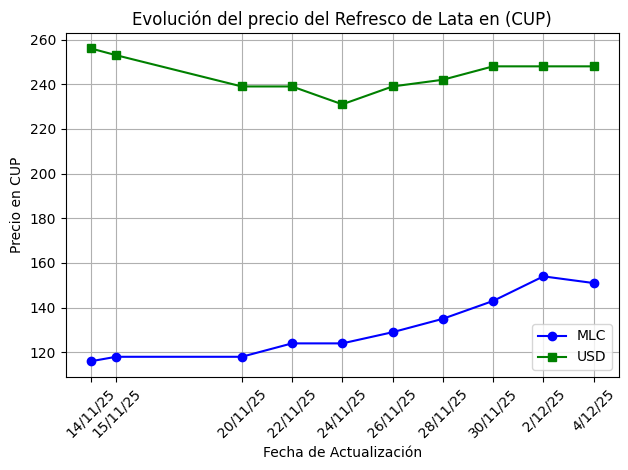

In [35]:
#Recordando aqui tenemos almacenados los valores del refresco de lata en ambas tiendas el cual es el mismo
refresco_mlc
refresco_usd
#Recordando aqui tenemos almacenados los valores que tuvieron el mlc y el usd a lo largo de la investigacion
valor_cambiomlc
valor_cambiousd
#Evolucion
precio_cup_mlc = []
precio_cup_usd = []
for mlc in valor_cambiomlc:
    precio_cup_mlc.append(round(mlc*refresco_mlc[0]))
for usd in valor_cambiousd:
    precio_cup_usd.append(round(usd*refresco_mlc[0]))


# Datos
fecha 
precio_cup_mlc
precio_cup_usd

# Convertir fechas y ordenar todo
fechas_convertidas = [datetime.strptime(f, "%d/%m/%y") for f in fecha]
datos = list(zip(fechas_convertidas, precio_cup_mlc, precio_cup_usd))
datos.sort()  # ordena por fecha

# Separar datos ya ordenados
fechas_ordenadas = [d[0] for d in datos]
mlc_ordenado = [d[1] for d in datos]
usd_ordenado = [d[2] for d in datos]

# Graficar
plt.plot(fechas_ordenadas, mlc_ordenado, 'o-b', label='MLC')
plt.plot(fechas_ordenadas, usd_ordenado, 's-g', label='USD')
plt.xticks(rotation=45)
plt.title("Evolución del precio del Refresco de Lata en (CUP)")
plt.xlabel("Fecha de Actualización")
plt.ylabel("Precio en CUP")
plt.legend()
plt.grid(True)
# Usar las fechas originales como etiquetas
plt.xticks(ticks=fechas_convertidas, labels=fecha, rotation=45)
plt.tight_layout()

plt.show()

    
